## Le contexte 
    Vous êtes un data scientist pour un client (fictif ou non) et vous devez présenter une analyse de données complètes, de la spécification des besoins, élaboration d’une problématique pertinente ainsi qu’une mise en oeuvre technique respectant les conditions ci-dessous. 
## Le livrable 
     - Jupyter notebook ou une application Streamlit 
     - le travail devra être déposé sur un gist/git (le lien devra être publique et actif jusqu’à la fin de la scolarité de l’étudiant) et devra être envoyé par mail ou messagerie Slack
## Contraintes 
     - Data avec minimum 10 colonnes 
     - Un maximum de commentaires dans le code
     - Texte type Markdown après chaque graphique/tableau (ex: description textuelle des features après chargement)
     - Tous les graphiques doivent être lisible (taille du graphique, infos représenté), si diagramme pas lisible, en faire une version filtrée dessous
     - Exposer concrètement votre problématique / question à définir : quel est le but de votre modèle et à quelle situation métier peut il correspondre ?
## Partie 1 : Analyse graphique des données (EDA)
     - Diagrammes de répartition des données (type gaussienne sur les données)
     - Vérification du nombre de données, si plusieurs données sont peu représentés (<5%) alors regrouper dans une seule et même catégorie, 1 pie chart avant/apres
     - Nettoyage des données manquantes, encodage (OneHot, dictionnaire ou Sklearn Encoder)
     - Boites à moustache avec données extrêmes
     - Heatmap + observations sur les corrélations
## Partie 2: Model Building
     - Choisir 1 algorithmes et faire varier ses paramètres (ex: max_depth, n_estimators,….)
     - Faire une veille (300 mots minimum) sur votre algorithme et expliquer le choix de vos paramètres 
     - Affichage des metrics classique (precision, r2, confusion matrix, accuracy…)
     - Sélection du meilleur paramétrage (si pas le temps expliquer votre approche)
     - Le model est-il en overfitting/underfitting/OK ?
## Partie 3: Features Importance 
     - Affichage sous forme de barplot (si classification sinon afficher les coefficients de votre regression et commentez)
     - Commentaire pertinents / hypothèse que vous pouvez formuler à partir de votre analyse
## Partie 4: Model Réexécution avec les features sélectionnés
     - Affichage des metrics standard et commentaire sur la pertinence

### Problématique : Comment déterminer le type primaire d'un pokémon ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/pokemon_alopez247.csv')
df

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [9]:
same_type_num = df[['Name', 'Type_1']].groupby('Type_1').count().reset_index()
same_type_num

,Type_1,Name
0,Bug,63
1,Dark,28
2,Dragon,24
3,Electric,36
4,Fairy,17
5,Fighting,25
6,Fire,47
7,Flying,3
8,Ghost,23
9,Grass,66


([<matplotlib.patches.Wedge at 0x133ed0790>,
 [Text(1.058814519338695, 0.29818084049376514, 'Bug'),
  Text(0.861506769087659, 0.6839635127813056, 'Dark'),
  Text(0.6858387676659674, 0.8600146421814151, 'Dragon'),
  Text(0.44024727699057054, 1.0080586962585005, 'Electric'),
  Text(0.19782720301921522, 1.0820648768653358, 'Fairy'),
  Text(-0.002396497836591722, 1.099997389450593, 'Fighting'),
  Text(-0.34174153460603135, 1.0455681343294252, 'Fire'),
  Text(-0.5596567318999189, 0.9469869811349585, 'Flying'),
  Text(-0.6631230579322518, 0.877649024404733, 'Ghost'),
  Text(-0.9457654348090885, 0.561718561488203, 'Grass'),
  Text(-1.0923964146611291, 0.12911263778387616, 'Ground'),
  Text(-1.0929486203329797, -0.1243515714104028, 'Ice'),
  Text(-0.8960756612488356, -0.6380034555685903, 'Normal'),
  Text(-0.45338643013662033, -1.0022179129151363, 'Poison'),
  Text(-0.10766977014625674, -1.0947178726030977, 'Psychic'),
  Text(0.3096967852500518, -1.0555036244399085, 'Rock'),
  Text(0.584220367

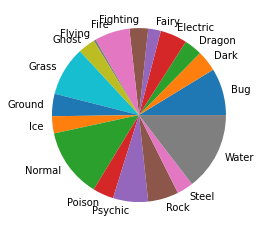

In [13]:
plt.pie(same_type_num.Name,labels= same_type_num.Type_1)

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.Color)
df.Color = le.transform(df.Color)
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,3,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,3,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,3,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,7,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,7,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


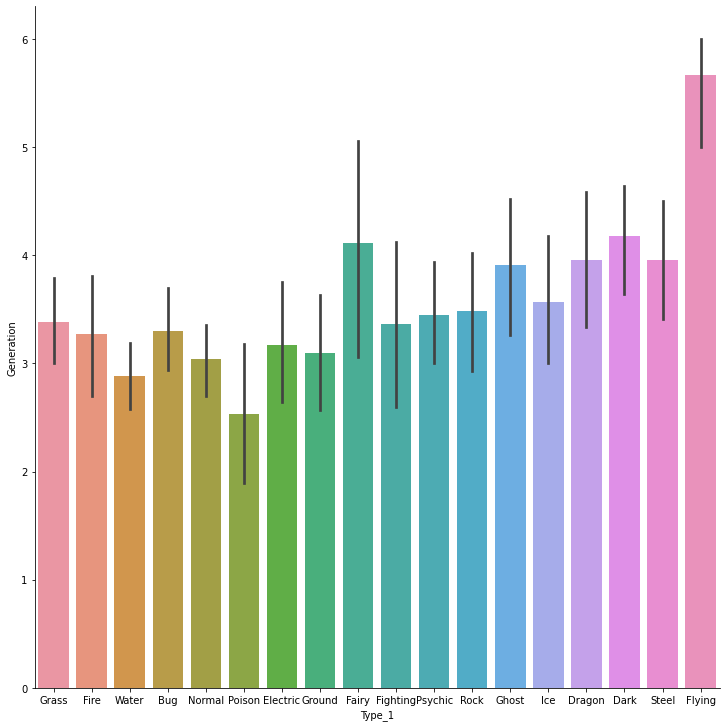

In [21]:
sns.catplot(x="Type_1", y="Generation", data= df, kind="bar", height=10)

<AxesSubplot:xlabel='Type_1', ylabel='Color'>

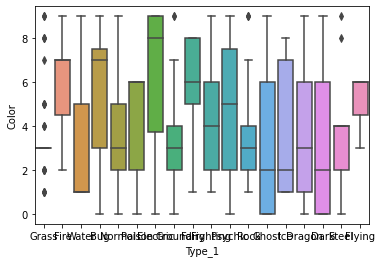

In [24]:
sns.boxplot(x="Type_1",y="Color",data=df)